In [1]:

import pandas as pd
import numpy as np
import cv2
import matplotlib.pylab as plt

In [2]:
img = cv2.imread('/content/atomic_section_image.jpg', cv2.IMREAD_GRAYSCALE)

array([[40, 40, 40, ..., 89, 87, 86],
       [39, 39, 38, ..., 90, 88, 87],
       [41, 41, 41, ..., 90, 88, 87],
       ...,
       [44, 48, 44, ..., 50, 53, 54],
       [42, 47, 43, ..., 50, 54, 50],
       [43, 41, 41, ..., 51, 50, 51]], dtype=uint8)
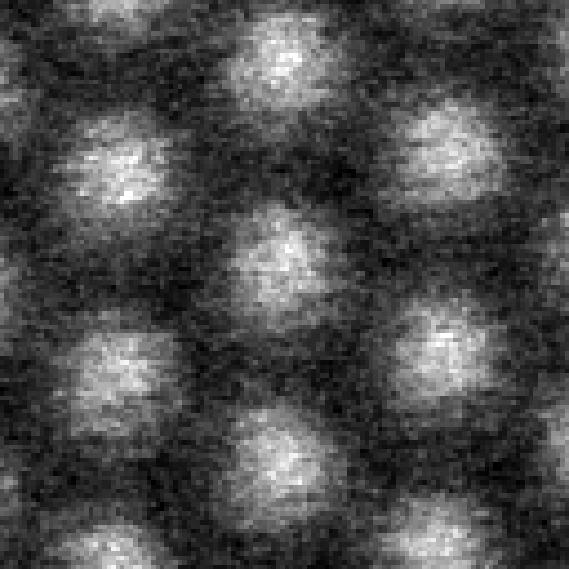

In [3]:
img

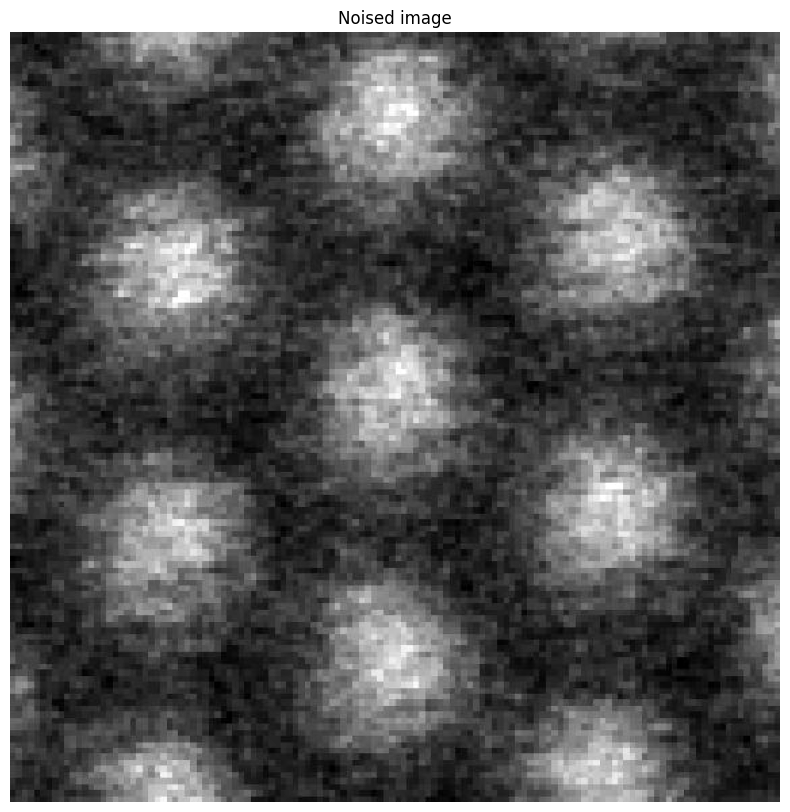

In [4]:


fig,ax = plt.subplots(figsize=(10,10))

ax.imshow(img,cmap='gray')
ax.axis('off')
ax.set_title('Noised image')
plt.show()



In [5]:
noisy_image = img
# 1. Create a 9x9 kernel and scan the full image
kernel_size = 9
kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size * kernel_size)

# 2. Impose the kernel on the image
filtered_image = cv2.filter2D(noisy_image, -1, kernel)

# 3. Scan the full image and find the change in kernel location
kernel_location_change = noisy_image - filtered_image

# 4. Analyze the change in intensity as a function of kernel location
mean_intensity_change = np.mean(kernel_location_change)
stddev_intensity_change = np.std(kernel_location_change)

print("Mean Intensity Change:", mean_intensity_change)
print("Standard Deviation of Intensity Change:", stddev_intensity_change)

Mean Intensity Change: 125.74988649034319
Standard Deviation of Intensity Change: 119.69097966898211


In [6]:
# Apply Gaussian blur to reduce noise and smoothen edges
blurred = cv2.GaussianBlur(src=img, ksize=(3, 5), sigmaX=0.5)

# Perform Canny edge detection
edges = cv2.Canny(blurred, 100, 150)

array([[40, 40, 40, ..., 89, 87, 86],
       [39, 39, 39, ..., 89, 88, 87],
       [41, 41, 40, ..., 89, 88, 87],
       ...,
       [44, 46, 44, ..., 50, 52, 53],
       [43, 46, 43, ..., 50, 53, 51],
       [43, 42, 42, ..., 51, 51, 51]], dtype=uint8)
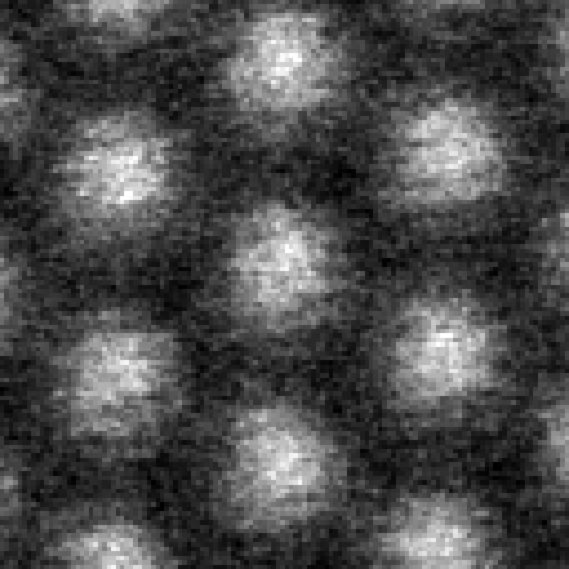

In [7]:
blurred


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
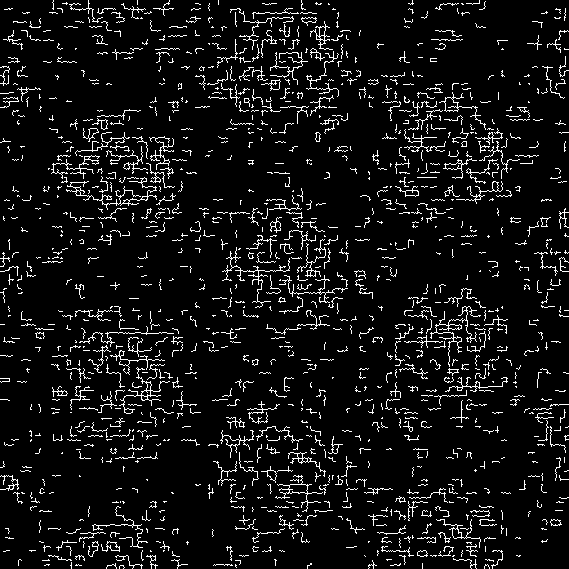

In [8]:
edges

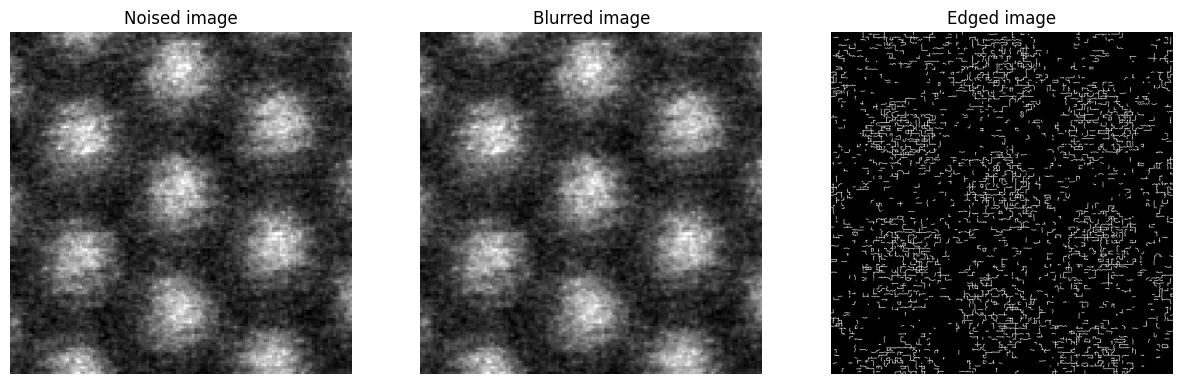

In [9]:
fig,axs = plt.subplots(1,3,figsize=(15,10))

axs[0].imshow(img,cmap='gray')
axs[0].axis('off')
axs[0].set_title('Noised image')
axs[1].imshow(blurred,cmap='gray')
axs[1].axis('off')
axs[1].set_title('Blurred image')
axs[2].imshow(edges,cmap='gray')
axs[2].axis('off')
axs[2].set_title('Edged image')
plt.show()

In [10]:
# Apply thresholding to create a binary image
_, binary_image = cv2.threshold(
    img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

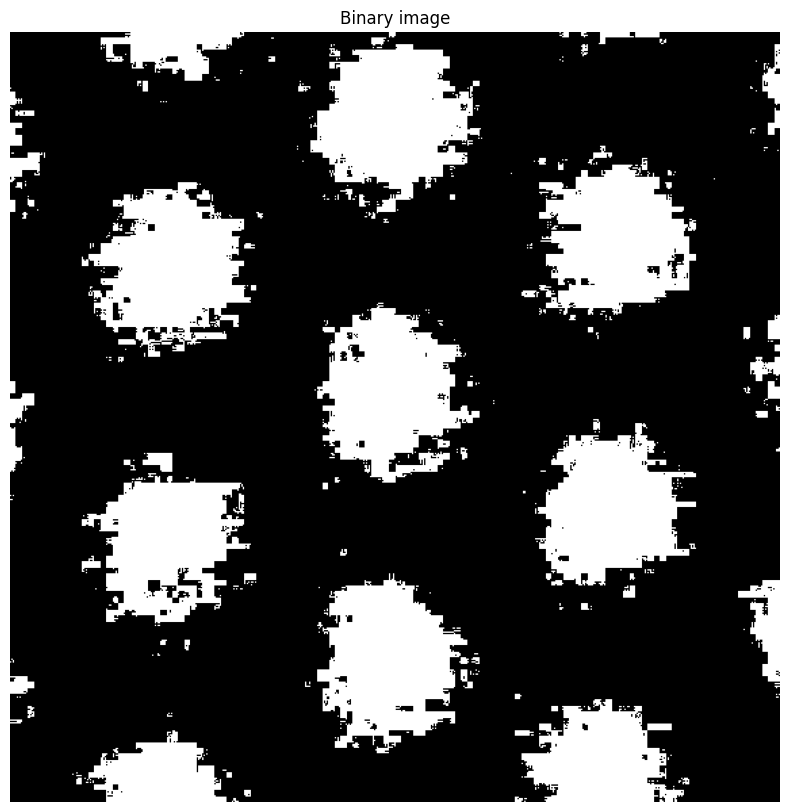

In [11]:
fig,ax = plt.subplots(figsize=(10,10))

ax.imshow(binary_image,cmap='gray')
ax.axis('off')
ax.set_title('Binary image')
plt.show()

In [12]:
def horizontal_profile(img,len1,len2):
  intensity_data = np.empty(len1)
  for j in range(len2):
    cnt = 0
    for i in range(len1):
      if (img[i][j] != 0):
        cnt += 1
    intensity_data[j] = cnt
  return intensity_data


def vertical_profile(img,len1,len2):
  intensity_data = np.empty(len1)
  for i in range(len1):
    cnt = 0
    for j in range(len2):
      if (img[i][j] != 0):
        cnt += 1
    intensity_data[i] = cnt
  return intensity_data

In [13]:
height,width = binary_image.shape

In [14]:
vertical_intensity_data = vertical_profile(binary_image,height,width)
horizontal_intensity_data = horizontal_profile(binary_image,height,width)

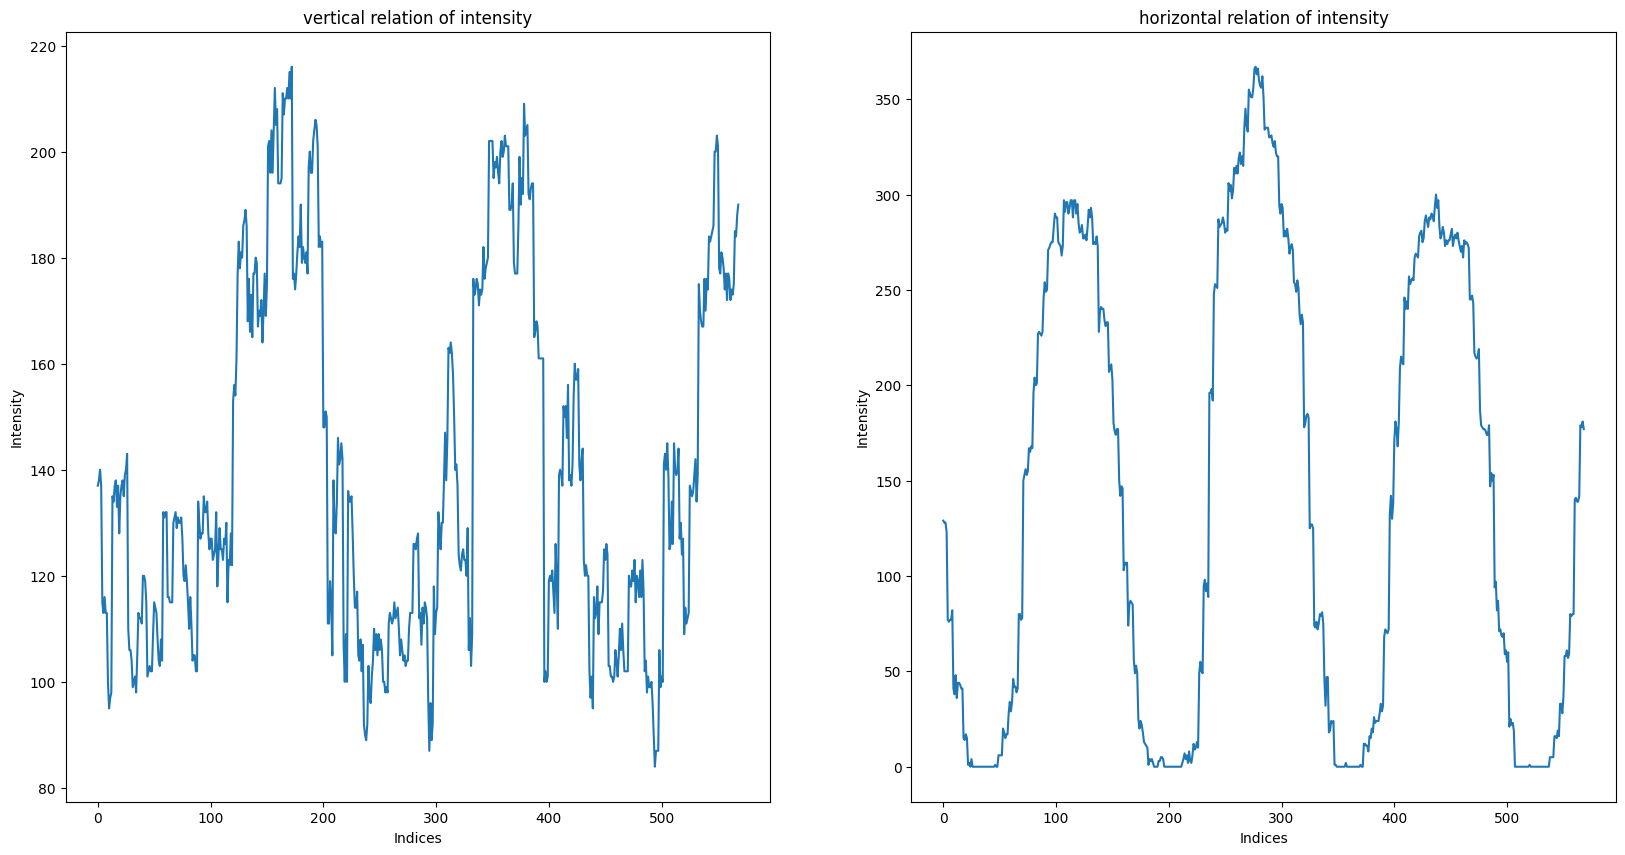

In [15]:
fig , axs = plt.subplots(1,2,figsize=(20,10))

axs[0].plot(vertical_intensity_data)
axs[0].set_title('vertical relation of intensity')
axs[0].set_xlabel('Indices')
axs[0].set_ylabel('Intensity')
axs[1].plot(horizontal_intensity_data)
axs[1].set_title('horizontal relation of intensity')
axs[1].set_xlabel('Indices')
axs[1].set_ylabel('Intensity')

plt.show()

Text(0, 0.5, 'Intensity')

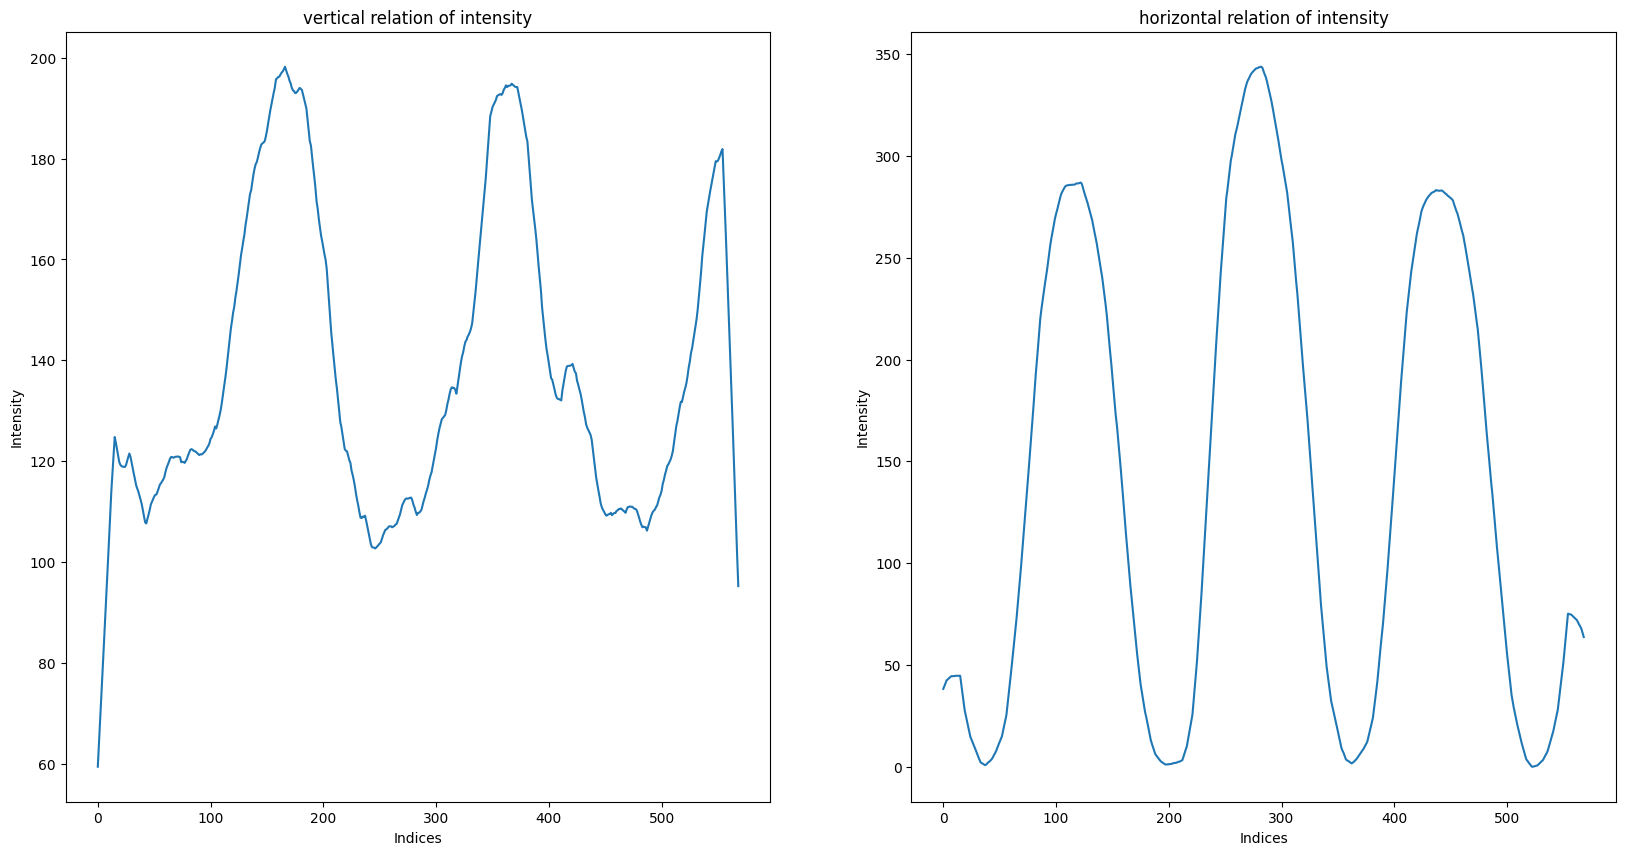

In [16]:


window_size = 30
y_ma = np.convolve(vertical_intensity_data, np.ones(window_size) / window_size, mode='same')
x_ma = np.convolve(horizontal_intensity_data, np.ones(window_size) / window_size, mode='same')


fig , axs = plt.subplots(1,2,figsize=(20,10))

axs[0].plot(y_ma)
axs[0].set_title('vertical relation of intensity')
axs[0].set_xlabel('Indices')
axs[0].set_ylabel('Intensity')
axs[1].plot(x_ma)
axs[1].set_title('horizontal relation of intensity')
axs[1].set_xlabel('Indices')
axs[1].set_ylabel('Intensity')


In [17]:
from scipy.signal import find_peaks
peaks_x, _ = find_peaks(x_ma,distance=20)
print("Local Maxima Indices:", peaks_x)


Local Maxima Indices: [ 13 122 282 437 554]


In [18]:
peaks_y, _ = find_peaks(y_ma,distance=20)
print("Local Maxima Indices:", peaks_y)

Local Maxima Indices: [ 15  83 104 166 237 277 314 367 421 472 517 554]


In [19]:
# Define the x-coordinates for the vertical lines (example x-coordinates)
image = img.copy()

# Set the color of the lines (e.g., red color in BGR format)
line_color = (0, 0, 255)

# Set the line thickness (you can adjust this)
line_thickness = 2

# Draw vertical lines on the image
for x in peaks_x:
    cv2.line(image, (x, 0), (x, image.shape[0]), line_color, line_thickness)
for y in peaks_y:
    cv2.line(image, (0, y), (image.shape[1], y), line_color, line_thickness)



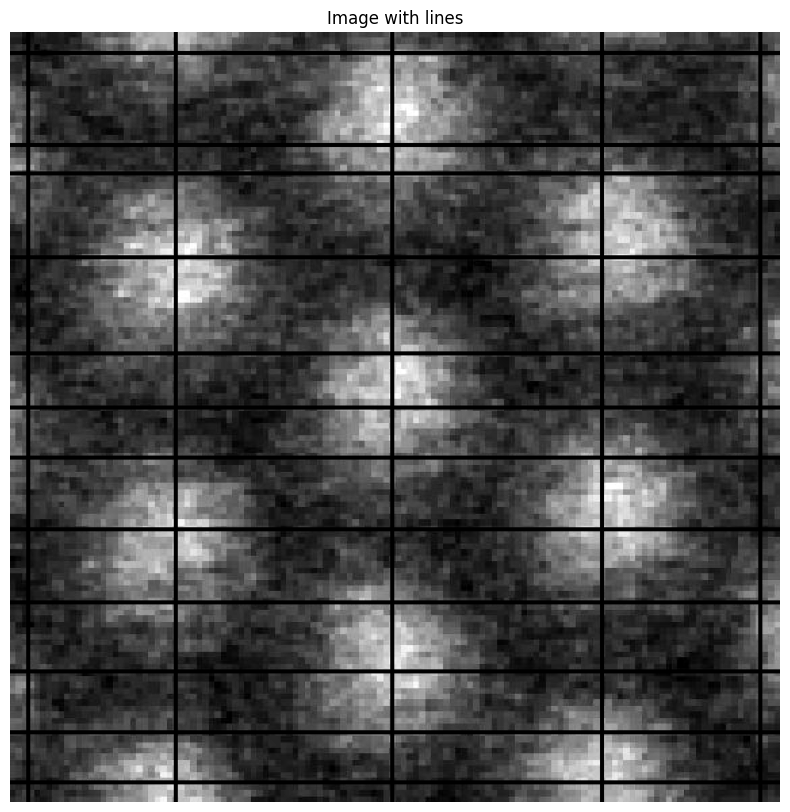

In [20]:
fig,ax = plt.subplots(figsize=(10,10))

ax.imshow(image,cmap='gray')
ax.axis('off')
ax.set_title('Image with lines')
plt.show()

In [21]:
new_peaks_x = [13,122,282,437,554]
new_peaks_y = [15,83,104 ,166 ,277, 314, 367, 472, 517, 554]

In [22]:
# Define the x-coordinates for the vertical lines (example x-coordinates)
new_image = img.copy()

# Set the color of the lines (e.g., red color in BGR format)
line_color = (0, 0, 255)

# Set the line thickness (you can adjust this)
line_thickness = 2

# Draw vertical lines on the image
for x in new_peaks_x:
    cv2.line(new_image, (x, 0), (x, new_image.shape[0]), line_color, line_thickness)
for y in new_peaks_y:
    cv2.line(new_image, (0, y), (new_image.shape[1], y), line_color, line_thickness)


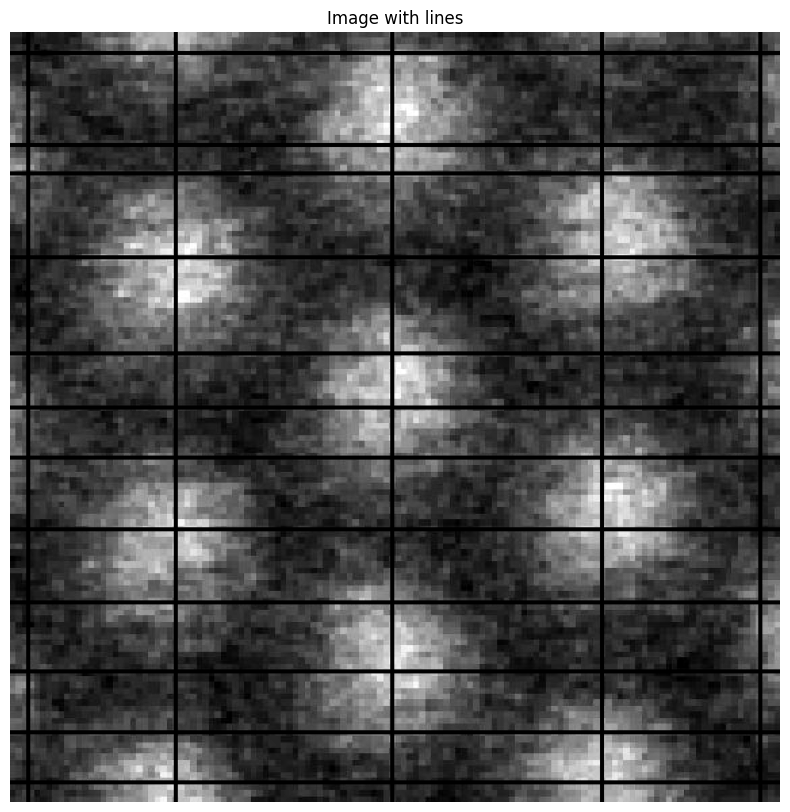

In [23]:
fig,ax = plt.subplots(figsize=(10,10))

ax.imshow(image,cmap='gray')
ax.axis('off')
ax.set_title('Image with lines')
plt.show()


In [24]:

new_peaks_x = [13,122,282,437,554]
new_peaks_y = [15,83,104 ,166 ,277, 314, 367, 472, 517, 554]


In [25]:
# Define the x-coordinates for the vertical lines (example x-coordinates)
new_image = img.copy()

# Set the color of the lines (e.g., red color in BGR format)
line_color = (0, 0, 255)

# Set the line thickness (you can adjust this)
line_thickness = 2

# Draw vertical lines on the image
for x in new_peaks_x:
    cv2.line(new_image, (x, 0), (x, new_image.shape[0]), line_color, line_thickness)
for y in new_peaks_y:
    cv2.line(new_image, (0, y), (new_image.shape[1], y), line_color, line_thickness)

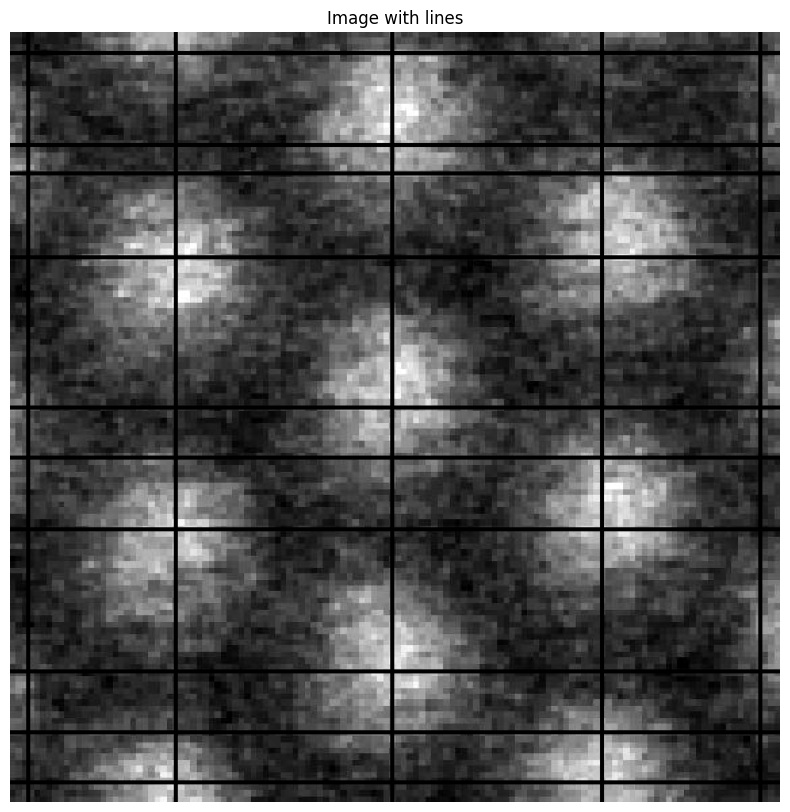

In [26]:
fig,ax = plt.subplots(figsize=(10,10))

ax.imshow(new_image,cmap='gray')
ax.axis('off')
ax.set_title('Image with lines')
plt.show()


In [27]:
valid_indices = [(2,0),(6,0),(10,0),(0,1),(3,1),(7,1),(11,1),(1,2),(5,2),(9,2),(0,3),(3,3),(7,3),(11,3),(1,4),(5,4),(9,4)]
# valid_indices = [(0,1),(3,1),(7,1),(11,1),(1,2),(5,2),(9,2),(3,3),(7,3),(11,3)]
Valid_points = []

for indices in valid_indices:
  Valid_points.append((peaks_x[indices[1]],peaks_y[indices[0]]))

In [28]:
Valid_points

[(13, 104),
 (13, 314),
 (13, 517),
 (122, 15),
 (122, 166),
 (122, 367),
 (122, 554),
 (282, 83),
 (282, 277),
 (282, 472),
 (437, 15),
 (437, 166),
 (437, 367),
 (437, 554),
 (554, 83),
 (554, 277),
 (554, 472)]

In [29]:
# Create a copy of the grayscale image
image_with_points = img.copy()

# Draw circles or points on the copy of the image
for point in Valid_points:
    cv2.circle(image_with_points, point, 10, (0, 0, 255), -1)  # Draws a red filled circle at each point

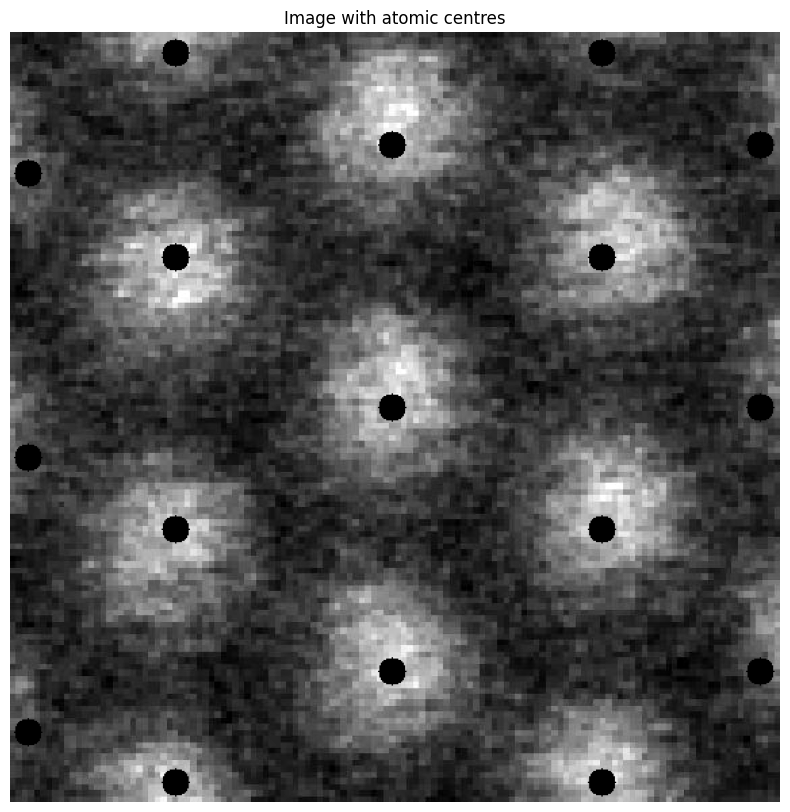

In [30]:
fig,ax = plt.subplots(figsize=(10,10))

ax.imshow(image_with_points,cmap='gray')
ax.axis('off')
ax.set_title('Image with atomic centres')
plt.show()

In [31]:

# Hexagonal points
points = [(114, 175), (114, 390), (278, 83),(278,277), (278, 472), (437, 166), (437, 367)]

In [32]:
# Create a copy of the grayscale image
image_with_numbers = img.copy()

# Define the font settings
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
font_color = (0, 0, 255)  # Red color in BGR
font_thickness = 2

# Draw circles or points on the copy of the image
number = 1
for point in points:
    cv2.putText(image_with_numbers, str(number), point, font, font_scale, font_color, font_thickness)
    number += 1


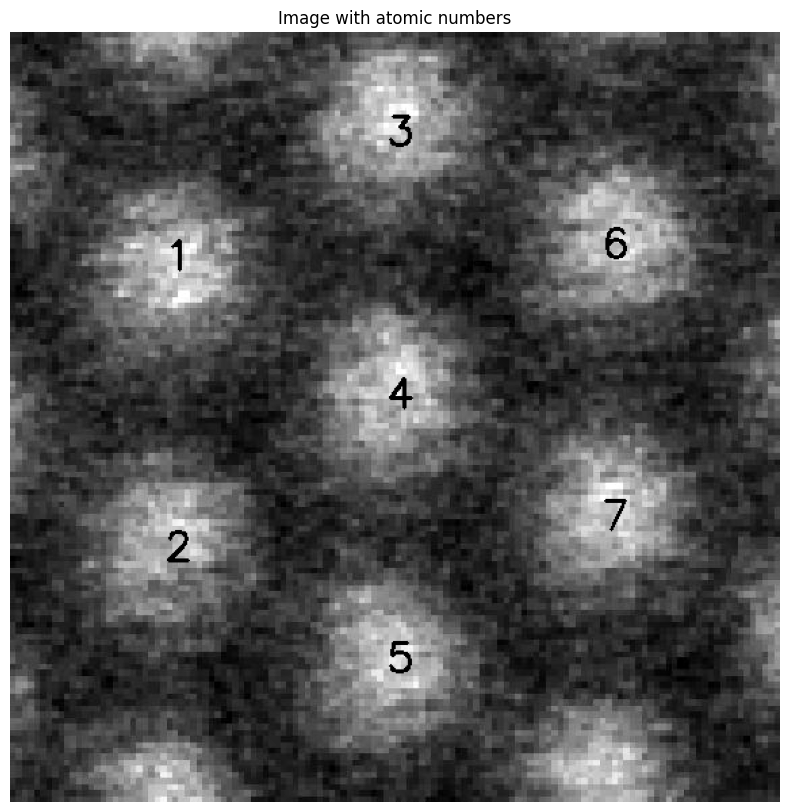

In [33]:


fig,ax = plt.subplots(figsize=(10,10))

ax.imshow(image_with_numbers,cmap='gray')
ax.axis('off')
ax.set_title('Image with atomic numbers')
plt.show()



In [34]:
atomic_distances = np.empty((7,7),dtype=float)
for i in range(7):
  for j in range(i,7):
    val = np.sqrt((points[i][0]-points[j][0])**2 + (points[i][1] - points[j][1])**2)
    atomic_distances[i][j] = val
    atomic_distances[j][i] = val

In [35]:
rounded_matrix = np.round(atomic_distances,decimals=2)

for i in range(7):
    row_str = " ".join(f"{cell:7.2f}" for cell in rounded_matrix[i][:7])
    print(row_str)

   0.00  215.00  188.04  193.13  339.27  323.13  375.76
 215.00    0.00  348.06  199.16  183.36  393.07  323.82
 188.04  348.06    0.00  194.00  389.00  179.36  325.48
 193.13  199.16  194.00    0.00  195.00  193.91  182.70
 339.27  183.36  389.00  195.00    0.00  344.84  190.54
 323.13  393.07  179.36  193.91  344.84    0.00  201.00
 375.76  323.82  325.48  182.70  190.54  201.00    0.00


In [36]:
margin = 10
tilt = abs(points[5][1]-points[0][1])+margin  #The slight distortion of atom 1 with atom 6 along the horizontal line

vertical_distance = atomic_distances[0][1]
horizontal_distance = atomic_distances[0][5]

point_8 =  (points[2][0] - horizontal_distance-margin, points[2][1] + tilt)
point_9 =  (point_8[0], point_8[1] + vertical_distance)
point_10 = (point_9[0],point_9[1] + vertical_distance)

point_11 = (points[0][0], points[0][1] - vertical_distance)
point_12 = (points[1][0], points[1][1] + vertical_distance)

point_13 = (points[5][0], points[5][1] - vertical_distance)
point_14 = (points[6][0], points[6][1] + vertical_distance)

point_15 = (points[2][0] + horizontal_distance + margin, points[2][1] - tilt)
point_16 = (point_15[0], point_15[1] + vertical_distance)
point_17 = (point_16[0], point_16[1] + vertical_distance)

In [37]:
new_points = [point_8,point_9,point_10,point_11,point_12,point_13,point_14,point_15,point_16,point_17]
points.extend(new_points)
points = np.round(points).astype(int)

In [38]:
points

array([[114, 175],
       [114, 390],
       [278,  83],
       [278, 277],
       [278, 472],
       [437, 166],
       [437, 367],
       [-55, 102],
       [-55, 317],
       [-55, 532],
       [114, -40],
       [114, 605],
       [437, -49],
       [437, 582],
       [611,  64],
       [611, 279],
       [611, 494]])

In [39]:
# Create a copy of the image
image_with_circles = binary_image.copy()

# Define the circle radius and Gaussian parameters
circle_radius = 90
sigma = 40  # Adjust the sigma to control the gradient spread

# Draw Gaussian-like filled circles at the specified points
for point in points:
    for x in range(max(point[0] - circle_radius, 0), min(point[0] + circle_radius, img.shape[1])):
        for y in range(max(point[1] - circle_radius, 0), min(point[1] + circle_radius, img.shape[0])):
            if (x - point[0]) ** 2 + (y - point[1]) ** 2 <= circle_radius ** 2:
                distance = np.sqrt((x - point[0]) ** 2 + (y - point[1]) ** 2)
                intensity = 255 * np.exp(-0.5 * (distance / sigma) ** 2)
                image_with_circles[y, x] = int(intensity)

In [40]:
for x in range(image_with_circles.shape[0]):
  for y in range(image_with_circles.shape[1]):
    if (image_with_circles[x][y] == 0 or image_with_circles[x][y] == 255):
      image_with_circles[x][y] = 20


In [41]:
image = image_with_circles

blurred = cv2.GaussianBlur(image, (0, 0), 5)
sharp = cv2.addWeighted(image, 1.7, blurred, -0.7, 0)

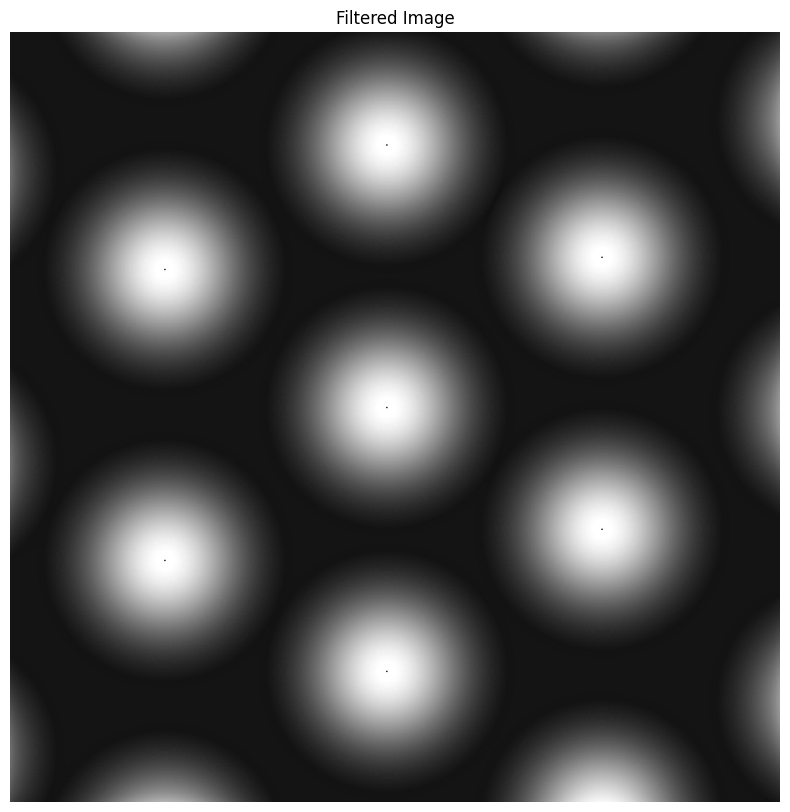

In [42]:
fig,ax = plt.subplots(figsize=(10,10))

ax.imshow(sharp,cmap='gray')
ax.axis('off')
ax.set_title('Filtered Image')
plt.show()

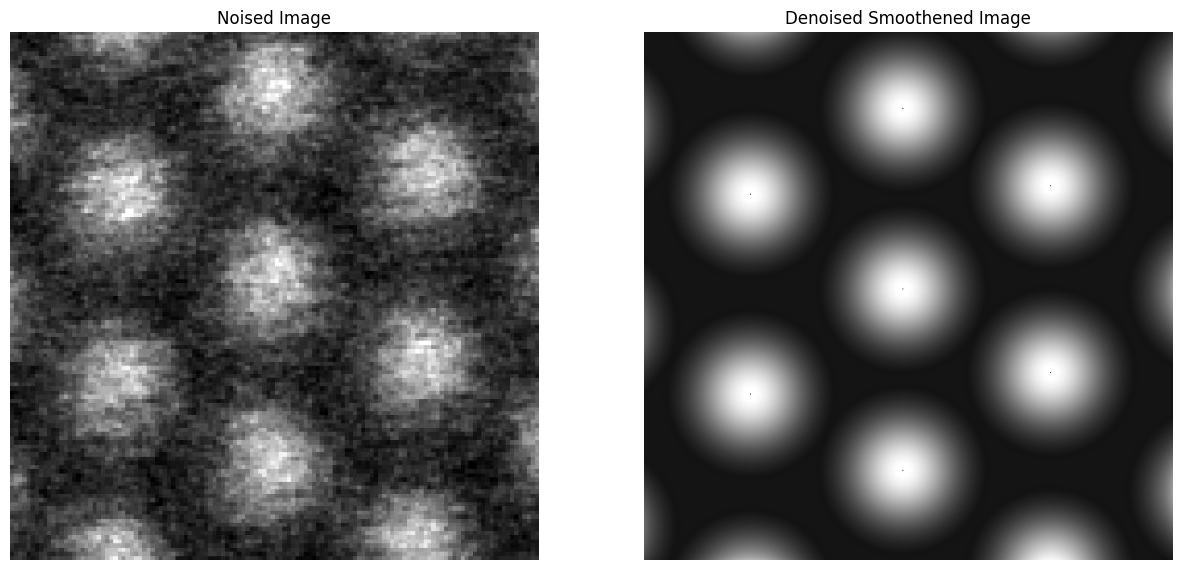

In [43]:
fig, axs = plt.subplots(1,2,figsize=(15,10))

axs[0].imshow(img,cmap='gray')
axs[0].axis('off')
axs[0].set_title('Noised Image')

axs[1].imshow(sharp,cmap='gray')
axs[1].axis('off')
axs[1].set_title('Denoised Smoothened Image')

plt.show()